In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Reading Data set
df=pd.read_csv(r"E:\data sets\SalaryData.csv",encoding='latin1')

# EDA(Exploratory Data Analysis)

In [4]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.describe

<bound method NDFrame.describe of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
df.shape

(30, 2)

In [23]:
df.YearsExperience.unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

# Visualization

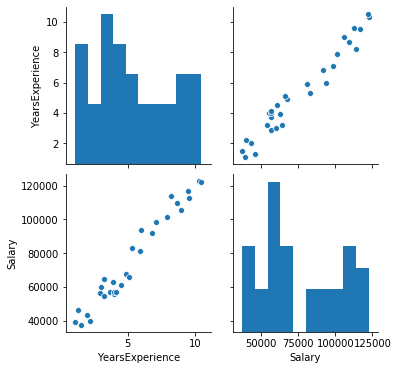

In [12]:
sns.pairplot(df)

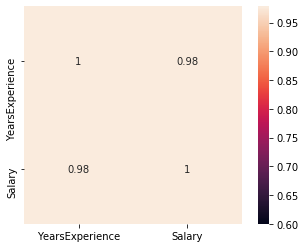

In [14]:
sns.heatmap(df.corr(),vmax=0.6,square=True,annot=True)

In [15]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

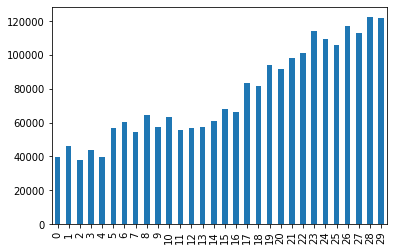

In [16]:
df[('Salary')].plot.bar()

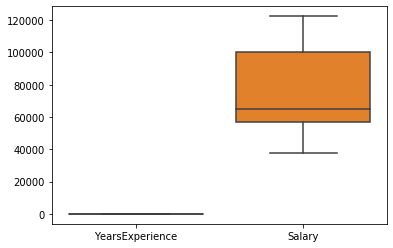

In [17]:
sns.boxplot(data=df)

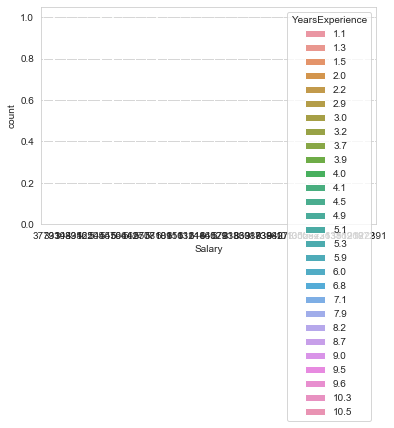

In [19]:
sns.set_style("whitegrid")
sns.countplot(x='Salary',hue='YearsExperience',data=df)


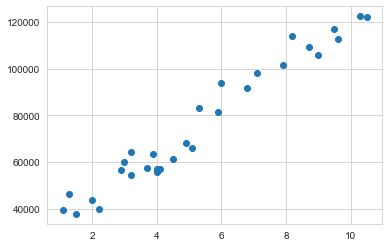

In [20]:
plt.scatter("YearsExperience", "Salary",data=df)
plt.show()

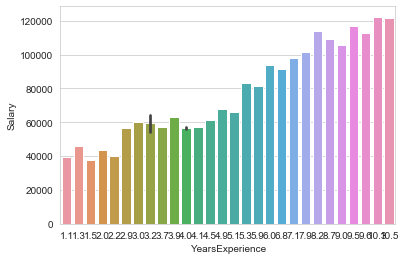

In [27]:
sns.barplot(x='YearsExperience',y='Salary',data=df)

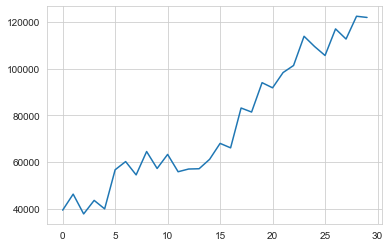

In [33]:
sns.lineplot(data=df.Salary)

# Train Test Split

In [109]:
X=df.iloc[:,0].values
Y=df.iloc[:,-1].values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [112]:
X_train=X_train.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

In [113]:
X_train
print(X_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


# Model Building

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model=LinearRegression()

In [116]:
model.fit(X_train,Y_train)

LinearRegression()

In [117]:
pred=model.predict(X_test)

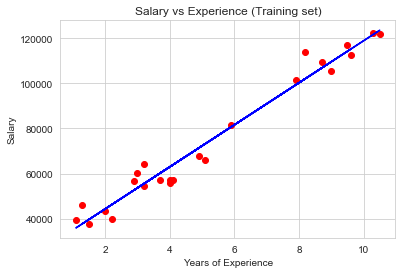

In [118]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Let's check model Performance

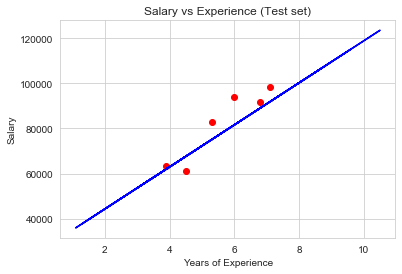

In [119]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [120]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,pred)

In [121]:
score

0.7616681465472094

In [123]:
# print the coefficients
print(model.intercept_)
print(model.coef_)

[25609.89799835]
[[9332.94473799]]


In [125]:
print(model.predict([[6]]))

[[81607.56642631]]
